In [1]:
import pandas as pd
from cleaning_functions_sharks import *
# Needs fixing / observations:
# Sex is missing in # cells (nan) nad has 8 cells
# There are names replaces by "male" and "Female"
# last two columns can be removed, (NaN as value)
# columns after 'source' were hidden, althoguh does not seem to relevant
# Going to work with Activity, Country, Type. Clean only these values

# Hipothesis
"""Null Hypothesis (H0): The number of shark attacks during surfing is not significantly higher in the USA compared to other countries, and there is no association between the popularity of surfing and shark attacks.

Alternative Hypothesis (H1): Most shark attacks occur during surfing, with a higher frequency in the USA due to the popularity of surfing as a sport, and these attacks are unprovoked."""
# most attacks are done when surfing and are located in the USA since surfing is a more popular sport there and it as unprovoked (explore more, see what other data is relevant and why)
# There are more attacks on America than other continent since they do more beach activities (Second hipothesis)



# main
# set options and start df cleaning
set_pd_options()
df = read_excel_to_df('GSAF5.xls')
df = rename_columns(df)
df = df.drop(['unnamed:_21','unnamed:_22'],axis=1) # remove last two columns (NaN mostly in all, not relevant

# clean variables
df = clean_country(df)
df = clean_activity(df)
df = clean_type(df)

print("activity after cleaning\n", df['activity'].value_counts())
print("country after cleaning\n", df['country'].value_counts())
print("type after cleaning\n", df['type'].value_counts())


pivot_table = df.pivot_table(index='country',columns='activity',values='date', aggfunc='count')


# Check hipothesis country, type against activity
pivot_table2 = df.pivot_table(index=['country','type'], 
                             columns='activity',values='date', aggfunc='count').fillna(0)



top_3_countries = pivot_table.sum(axis=1).sort_values(ascending=False).head(3).index
top_3_activity = pivot_table.sum(axis=0).sort_values(ascending=False).head(3).index
print(pivot_table.loc[top_3_countries,top_3_activity])
print(pivot_table2.loc[top_3_countries,top_3_activity])




activity after cleaning
 activity
swimming                                                                                                                                                                                       1387
surfing                                                                                                                                                                                        1255
fishing                                                                                                                                                                                        1178
diving                                                                                                                                                                                          634
not_confirmed                                                                                                                                                                         

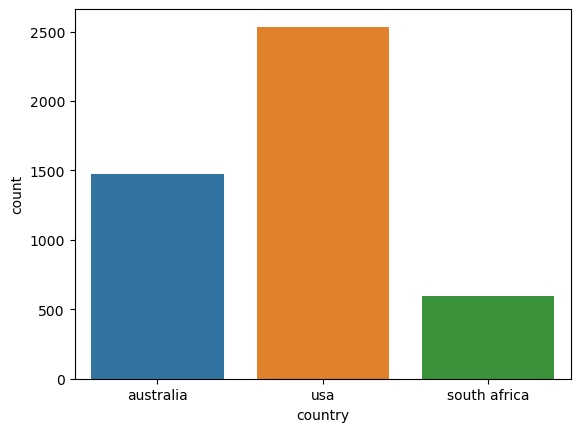

In [4]:
top_visualize(df,'country','activity') # top 3 countries

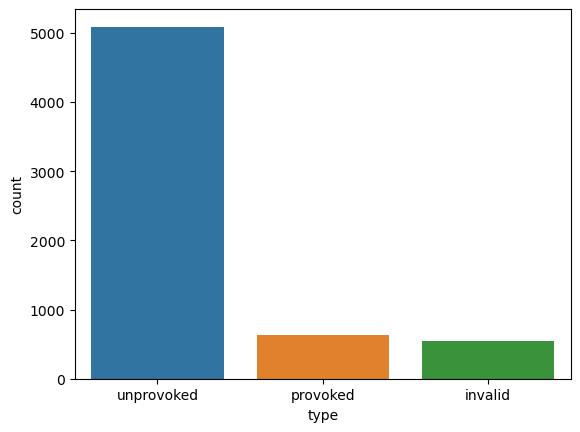

In [2]:
top_visualize(df,'type','country') # top 3 type of attacks

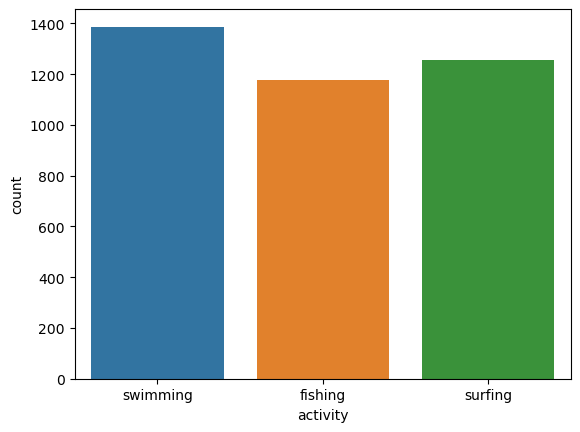

In [3]:
top_visualize(df,'activity','country') # top 3 type of attacks